In [3342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3343]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3344]:
idtest = test["PassengerId"]

In [3345]:
print(len(train))
print(len(test))

891
418


In [3346]:
train_y = train["Survived"]
#test_y = test["Survived"]

In [3347]:
train_x = train.drop(columns= 'Survived')
test_x = test

In [3348]:
train_x.Sex = pd.Categorical(train_x.Sex)
test_x.Sex = pd.Categorical(test_x.Sex)

In [3349]:
# train_x.Sex = train_x.Sex.cat.codes
# test_x.Sex = test_x.Sex.cat.codes

In [3350]:
train_x['Embarked'] = train_x['Embarked'].fillna(train_x['Embarked'].value_counts().index[0])
test_x['Embarked'] = test_x['Embarked'].fillna(test_x['Embarked'].value_counts().index[0])

In [3351]:
train_x['Cabin'] = train_x['Cabin'].notnull().astype('int')
test_x['Cabin'] = test_x['Cabin'].notnull().astype('int')


In [3352]:
train_x['Age'] = train_x['Age'].fillna(round(train_x["Age"].mean()))
test_x['Age'] = test_x['Age'].fillna(round(test_x["Age"].mean()))
test_x['Fare'] = test_x['Fare'].fillna(round(test_x["Fare"].mean()))

In [3353]:
train_x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3354]:
train_x.loc[train_x['Name'].str.contains('Miss.', case=False), 'Name'] = "1"
train_x.loc[train_x['Name'].str.contains('Ms.', case=False), 'Name'] = "2"
train_x.loc[train_x['Name'].str.contains('Mrs.', case=False), 'Name'] = "3"
train_x.loc[train_x['Name'].str.contains('Mr.', case=False), 'Name'] = "3"
train_x.loc[train_x['Name'].str.contains('Rev.', case=False), 'Name'] = "4"
train_x.loc[train_x['Name'].str.contains('Dr.', case=False), 'Name'] = "5"
train_x.loc[train_x['Name'].str.contains('Capt.', case=False), 'Name'] = "6"
train_x.loc[train_x['Name'].str.contains('Master.', case=False), 'Name'] = "7"
train_x.loc[train_x['Name'].str.contains('Major.', case=False), 'Name'] = "8"
train_x.loc[train_x['Name'].str.contains('Col.', case=False), 'Name'] = "9"

test_x.loc[test_x['Name'].str.contains('Miss.', case=False), 'Name'] = "1"
test_x.loc[test_x['Name'].str.contains('Ms.', case=False), 'Name'] = "2"
test_x.loc[test_x['Name'].str.contains('Mrs.', case=False), 'Name'] = "3"
test_x.loc[test_x['Name'].str.contains('Mr.', case=False), 'Name'] = "3"
test_x.loc[test_x['Name'].str.contains('Rev.', case=False), 'Name'] = "4"
test_x.loc[test_x['Name'].str.contains('Dr.', case=False), 'Name'] = "5"
test_x.loc[test_x['Name'].str.contains('Capt.', case=False), 'Name'] = "6"
test_x.loc[test_x['Name'].str.contains('Master.', case=False), 'Name'] = "7"
test_x.loc[test_x['Name'].str.contains('Major.', case=False), 'Name'] = "8"
test_x.loc[test_x['Name'].str.contains('Col.', case=False), 'Name'] = "9"

In [3355]:
test_x["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [3356]:
train_x['Name']=train_x.Name.apply(lambda x: np.where(x.isdigit(),x,'0'))
test_x['Name']=test_x.Name.apply(lambda x: np.where(x.isdigit(),x,'0'))

In [3357]:
train_x["Age"] = train_x["Age"].astype(np.uint8)
test_x["Age"] = test_x["Age"].astype(np.uint8)

In [3358]:
train_x["Pclass"] = train_x["Pclass"].astype(str)
test_x["Pclass"] = test_x["Pclass"].astype(str)

In [3359]:
train_x = train_x.drop( columns= ['PassengerId', 'Ticket'])
test_x = test_x.drop( columns= ['PassengerId', 'Ticket'])

In [3360]:
# train_x.Embarked = pd.Categorical(train_x.Embarked)
# train_x.Embarked = train_x.Embarked.cat.codes

# test_x.Embarked = pd.Categorical(test_x.Embarked)
# test_x.Embarked = test_x.Embarked.cat.codes

In [3361]:
train_x.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [3362]:
test_x.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [3363]:
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

In [3364]:
train_x

,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Name_0,Name_1,...,Name_5,Name_6,Name_7,Name_8,Name_9,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,7.2500,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38,1,0,71.2833,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,35,1,0,53.1000,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,35,0,0,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27,0,0,13.0000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,19,0,0,30.0000,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
888,30,1,2,23.4500,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
889,26,0,0,30.0000,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [3365]:

train_x = train_x.drop(columns=['Name_6', 'Name_8','Name_2','Name_4','Name_5','Name_9', 'Name_0'])
test_x = test_x.drop(columns=['Name_2','Name_4','Name_5','Name_9', 'Name_0'])

# train_x = train_x.drop(columns=['Name_6','Name_8'])

In [3366]:
X_train, X_test, y_train, y_test = train_test_split( train_x, train_y, test_size=0.2, random_state=42)

In [3367]:
model = RandomForestClassifier(n_estimators=300, max_depth= 13)

In [3368]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=300)

In [3369]:
y_pred =  model.predict(X_test)

In [3370]:
 accuracy_score(y_test, y_pred)

0.8491620111731844

In [3371]:
recall_score(y_test, y_pred)

0.7972972972972973

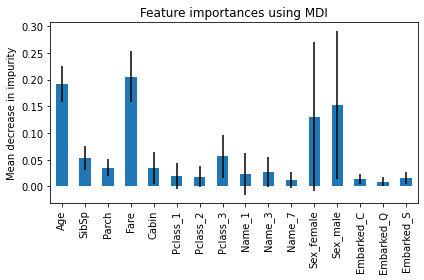

In [3372]:
importances = model.feature_importances_
forest_importances = pd.Series(importances, index = train_x.columns)

std = np.std([
    tree.feature_importances_ for tree in model.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [3373]:
# train_x = train_x.drop(columns=['Name_6', 'Name_8'])

In [3374]:
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=13, n_estimators=300)

In [3375]:
train_x["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [3376]:
test_x

,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Name_1,Name_3,Name_7,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34,0,0,7.8292,0,0,0,1,0,1,0,0,1,0,1,0
1,47,1,0,7.0000,0,0,0,1,0,1,0,1,0,0,0,1
2,62,0,0,9.6875,0,0,1,0,0,1,0,0,1,0,1,0
3,27,0,0,8.6625,0,0,0,1,0,1,0,0,1,0,0,1
4,22,1,1,12.2875,0,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30,0,0,8.0500,0,0,0,1,0,1,0,0,1,0,0,1
414,39,0,0,108.9000,1,1,0,0,0,0,0,1,0,1,0,0
415,38,0,0,7.2500,0,0,0,1,0,1,0,0,1,0,0,1
416,30,0,0,8.0500,0,0,0,1,0,1,0,0,1,0,0,1


In [3377]:
y_pred =  model.predict(test_x)

In [3378]:
d = {'col1': [1, 2], 'col2': [3, 4]}

In [3379]:
result = pd.DataFrame(data = {'PassengerId' : idtest , 'Survived' : y_pred})

In [3380]:
result.to_csv("submit.csv", index = False)